# First Project

## Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv("./valorant.csv")
df

,kills,deaths,assists,kda,acs,map,agent,matchOutcome,created_at
0,9,15,16,1.666667,137.500000,Bind,Sage,0,2023-08-02 18:49:46
1,22,10,10,3.200000,305.250000,Ascent,Breach,1,2023-08-02 18:49:46
2,20,14,5,1.785714,265.857143,Pearl,Gekko,0,2023-08-02 18:49:46
3,13,8,6,2.375000,251.400000,Fracture,Gekko,1,2023-08-02 18:49:46
4,21,19,8,1.526316,256.521739,Split,Omen,1,2023-08-02 18:49:46
...,...,...,...,...,...,...,...,...,...
64,9,15,5,0.933333,140.950000,Bind,Fade,0,2023-08-03 14:31:39
65,17,15,1,1.200000,266.666667,Lotus,Fade,0,2023-08-03 14:47:33
66,10,18,7,0.944444,153.500000,Bind,Brimstone,0,2023-08-05 10:38:04
67,24,13,7,2.384615,297.739130,Lotus,Breach,1,2023-08-05 10:38:04


## Data Preparation

### Drop Unnecessary Columns

In [2]:
# Drop unnecessary columns
df = df.drop(['created_at'], axis=1)
df

,kills,deaths,assists,kda,acs,map,agent,matchOutcome
0,9,15,16,1.666667,137.500000,Bind,Sage,0
1,22,10,10,3.200000,305.250000,Ascent,Breach,1
2,20,14,5,1.785714,265.857143,Pearl,Gekko,0
3,13,8,6,2.375000,251.400000,Fracture,Gekko,1
4,21,19,8,1.526316,256.521739,Split,Omen,1
...,...,...,...,...,...,...,...,...
64,9,15,5,0.933333,140.950000,Bind,Fade,0
65,17,15,1,1.200000,266.666667,Lotus,Fade,0
66,10,18,7,0.944444,153.500000,Bind,Brimstone,0
67,24,13,7,2.384615,297.739130,Lotus,Breach,1


### Create New Features

In [3]:
# Create new features
df['Zero_Deaths'] = (df['deaths'] == 0).astype(int)
df['kda'] = (df['kills'] + df['assists']) / df['deaths'].apply(lambda x: max(1, x))
df

,kills,deaths,assists,kda,acs,map,agent,matchOutcome,Zero_Deaths
0,9,15,16,1.666667,137.500000,Bind,Sage,0,0
1,22,10,10,3.200000,305.250000,Ascent,Breach,1,0
2,20,14,5,1.785714,265.857143,Pearl,Gekko,0,0
3,13,8,6,2.375000,251.400000,Fracture,Gekko,1,0
4,21,19,8,1.526316,256.521739,Split,Omen,1,0
...,...,...,...,...,...,...,...,...,...
64,9,15,5,0.933333,140.950000,Bind,Fade,0,0
65,17,15,1,1.200000,266.666667,Lotus,Fade,0,0
66,10,18,7,0.944444,153.500000,Bind,Brimstone,0,0
67,24,13,7,2.384615,297.739130,Lotus,Breach,1,0


### One-Hot Encoding

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding
categorical_columns = ['map', 'agent']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded features with the new features (Zero_Deaths and KDA)
X = pd.concat([df[['matchOutcome', 'Zero_Deaths', 'kda']], encoded_df], axis=1)

X





,matchOutcome,Zero_Deaths,kda,map_Ascent,map_Bind,map_Fracture,map_Haven,map_Lotus,map_Pearl,map_Split,...,agent_Brimstone,agent_Chamber,agent_Fade,agent_Gekko,agent_Jett,agent_Omen,agent_Phoenix,agent_Reyna,agent_Sage,agent_Skye
0,0,0,1.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,3.200000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1.785714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,2.375000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,1.526316,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,0,0.933333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0,0,1.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0,0,0.944444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,1,0,2.384615,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### X-Separation

In [5]:
X = X.drop(['matchOutcome'], axis=1)
X

,Zero_Deaths,kda,map_Ascent,map_Bind,map_Fracture,map_Haven,map_Lotus,map_Pearl,map_Split,agent_Breach,agent_Brimstone,agent_Chamber,agent_Fade,agent_Gekko,agent_Jett,agent_Omen,agent_Phoenix,agent_Reyna,agent_Sage,agent_Skye
0,0,1.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,3.200000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.785714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2.375000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.526316,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,0.933333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0,1.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0,0.944444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0,2.384615,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Y-Separation

In [6]:
Y = df['matchOutcome']
Y

0     0
1     1
2     0
3     1
4     1
     ..
64    0
65    0
66    0
67    1
68    0
Name: matchOutcome, Length: 69, dtype: int64

### Data Splitting

In [7]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X_train, X_test, y_train, y_test = train_test_split(X, df['matchOutcome'], test_size=0.2, random_state=100)

In [8]:
X_train

,Zero_Deaths,kda,map_Ascent,map_Bind,map_Fracture,map_Haven,map_Lotus,map_Pearl,map_Split,agent_Breach,agent_Brimstone,agent_Chamber,agent_Fade,agent_Gekko,agent_Jett,agent_Omen,agent_Phoenix,agent_Reyna,agent_Sage,agent_Skye
0,0,1.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28,0,1.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,0,0.869565,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,1.055556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41,0,2.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32,0,2.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0,2.100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30,0,2.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0,3.250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33,0,1.777778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
X_test

,Zero_Deaths,kda,map_Ascent,map_Bind,map_Fracture,map_Haven,map_Lotus,map_Pearl,map_Split,agent_Breach,agent_Brimstone,agent_Chamber,agent_Fade,agent_Gekko,agent_Jett,agent_Omen,agent_Phoenix,agent_Reyna,agent_Sage,agent_Skye
39,0,0.866667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0,1.714286,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23,0,1.052632,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56,0,1.083333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38,0,1.928571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0,0.933333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0,2.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,0,1.312500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0,0.200000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0,1.909091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Model Building

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

#### Applying the model to make a prediction

In [11]:
# Assuming you have preprocessed and encoded your data and have X_train and X_test ready

# Initialize and train the LinearRegression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the training set
y_lr_train_pred = lr.predict(X_train)

# Make predictions on the testing set
y_lr_test_pred = lr.predict(X_test)


In [12]:
y_lr_train_pred

array([ 4.53821235e-01,  5.85525232e-01, -8.88178420e-16,  4.27365732e-01,
        5.53158808e-01,  4.96297468e-01,  7.80740359e-01,  1.06637711e+00,
        1.32061579e+00,  4.25220859e-01,  2.16203334e-02,  1.27302417e+00,
        3.69279218e-01,  9.34265897e-01,  5.38201960e-01,  3.97263099e-01,
        5.81759184e-01,  3.74897793e-01,  6.14964729e-01,  5.78555482e-01,
        3.13932118e-01,  6.97004578e-01,  9.80310153e-01,  5.63789550e-01,
        7.91318864e-01,  4.52566115e-01,  5.97949664e-01,  2.54142449e-01,
        1.09709110e+00,  3.89984539e-01,  5.08802206e-01,  6.36896949e-01,
        8.26421193e-02,  5.40288643e-01,  9.46368740e-01,  5.41595389e-01,
        2.21348420e-01,  1.44772038e-01,  8.56986426e-01,  7.41668022e-01,
        4.78033859e-01,  9.02908904e-01,  9.11606310e-02,  1.57498995e-01,
        3.45916605e-01,  5.73961298e-01,  6.21526286e-01,  4.22351694e-01,
        7.17739062e-02,  1.37411914e+00,  4.14474768e-01,  9.49779022e-01,
        1.51106771e-01,  

In [13]:
y_lr_test_pred

array([ 0.63138808,  0.43165174,  0.17769972,  0.42665417,  0.5427592 ,
       -0.1762885 ,  0.69241845,  0.10140659,  0.00619613,  0.52958833,
        0.06772069,  0.49629747,  0.28032344,  0.03178583])

#### Evaluate Model Performance

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R2 scores for training data
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# Calculate MSE and R2 scores for testing data
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [15]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.1387237555002417
LR R2 (Train):  0.4359686016287213
LR MSE (Test):  0.18791641103542098
LR R2 (Test):  0.2483343558583161


In [16]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [17]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.138724,0.435969,0.187916,0.248334


### Random Forest

#### Training the model

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Applyng the model to make a predction

In [19]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

#### Evaluate model performance

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [21]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.134829,0.451804,0.148338,0.406647


### Model Comparison

In [22]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.138724,0.435969,0.187916,0.248334
1,Random Forest,0.134829,0.451804,0.148338,0.406647


## Data visualization of prediction results

Text(0.5, 0, 'Experimental LogS')

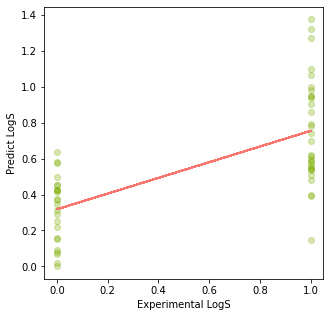

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)  # Corrected function name here

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Match Outcome')
plt.xlabel('Experimental Match Outcome')
